In [125]:
import random
import numpy as np
import pandas as pd
import matplotlib
import pylab

Function to create a training set and a testing set matrix based off on the data passed throught to it

In [126]:
def createSets(ones, x, xSquare, training):
    onesTrain = np.empty(0)
    onesTest = np.empty(0)
    xTrain = np.empty(0)
    xTest = np.empty(0)
    xSTrain = np.empty(0)
    xSTest = np.empty(0)
    #Assuming we work only with 150 data values
    for i in range(150):
        #Training is the 80% data chosen to be used for training data
        if i in training:
            onesTrain = np.append(ones[i], onesTrain)
            xTrain = np.append(x[i], xTrain)
            xSTrain = np.append(xSquare[i], xSTrain)
        else:
            onesTest = np.append(ones[i], onesTest)
            xTest = np.append(x[i], xTest)
            xSTest = np.append(xSquare[i], xSTest)   
            
    matrixTrain = np.array([onesTrain , xTrain , xSTrain])
    matrixTest = np.array([onesTest , xTest , xSTest])
    
    return(matrixTrain, matrixTest, xTrain, xTest)

Seperate the training y data(actual output) and the testing y data.

In [127]:
def assignY(yValues, training):
    yTrain = np.empty(0)
    yTest = np.empty(0)
    for i in range(150):
        if i in training:
            yTrain = np.append(yValues[i], yTrain)
        else:
            yTest = np.append(yValues[i], yTest)

    return (yTrain, yTest)

Create the random set of training data - 4a

In [128]:
xValues = np.random.normal(0, 10, 150)
ones = np.ones(150)
x = np.empty(150)
xSquare = np.empty(150)

Create the design matrix later on but the data for it is created here as well as an easy visualisation
Note that the createSets functions creates the two design matrices, could make 1 unified one but chose note to

In [129]:
for i in range(150):
    x[i] = xValues[i]
    xSquare[i] = xValues[i]**2 #chose this, less accurate but faster

#numbers = np.arange(0,149)
data = pd.DataFrame(ones)
data.columns = ['1']
data['x'] = x
data['x^2'] = xSquare
data

,1,x,x^2
0,1.0,1.846343,3.408984
1,1.0,3.454143,11.931103
2,1.0,-2.124364,4.512922
3,1.0,6.456764,41.689798
4,1.0,2.074962,4.305465
...,...,...,...
145,1.0,-9.031734,81.572225
146,1.0,-2.862812,8.195690
147,1.0,-3.402801,11.579057
148,1.0,-10.130092,102.618757


Arbritrary choice for thetas, if you'd like to test different ones in a range, do so - 4a iii

In [130]:
thetas = np.random.uniform(0,3,3)
print(thetas)

[1.30987464 2.23018416 2.68084159]


A lot is done here, the creation of the y values is done but at the same time noise is added since redesigned and worked back to here
Chose to choose randomly which indices would have noise, then changed the value of the y at that point to the value of the noise generated at that point.
Can easily increase the noise by changing the noise level which is just the number of elements that are noise elements

Then plotted.
Created a testing array of elements for testing - not necessary but can be used
Also created the training data set at random using 80% of the data to train and then to test 20%

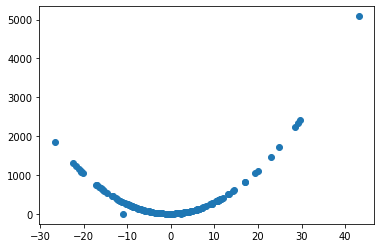

In [131]:
yValues = np.empty(150)
noiseLevel = 2 #How much noise data you'd like
noiseIndices = np.array(random.sample(range(0,149),noiseLevel))
noiseY = np.random.normal(0, 8, noiseLevel)
j = 0
for i in range(150):
    if i not in noiseIndices:
        yValues[i] = thetas[0]*ones[i] + thetas[1]*x[i] + thetas[2]*xSquare[i]
    else:
        yValues[i] = noiseY[j]
        j = j + 1

data['y'] = yValues
#data
matplotlib.pyplot.scatter(x,yValues)

training = np.array(random.sample(range(0,149),int(0.8*150)))
testing = np.empty(0)
size = len(training)
for i in range(size):
    if i != training[i]:
        testing = np.append(i,testing)
        


Create the training matrix and testing matrix given our, 1s, x, x squared and the training indices to be used.
Also created the y training and y testing set

In [132]:
matrixTrain, matrixTest, xTrain, xTest = createSets(ones, x, xSquare, training)
yTrain, yTest = assignY(yValues, training)
temp = np.linalg.pinv(matrixTrain)
temp = np.multiply(temp, yTrain[:, None])


If there is no noise, the guess is very accurate with small amount of error, as the number of error/noise elements are introduced to our training the theta error dramatically increases

In [133]:
thetaGuess = [sum(x) for x in zip(*temp)]
print(thetas)
print(thetaGuess)

[1.30987464 2.23018416 2.68084159]
[-1.153316788200134, 2.4743498276891, 2.677511815687855]


function for finding the training error

In [134]:
def trainingError(yTraining, matrixTrain, thetasGuess):
    
    size = len(yTraining)
    tot = float(0)
    for i in range(size):
        tot = tot + (yTraining[i] - (matrixTrain[0][i]*thetasGuess[0] + matrixTrain[1][i]*thetasGuess[1] + matrixTrain[2][i]*thetasGuess[2] ))**2

    return tot*(0.5)

In [135]:
print(trainingError(yTrain,matrixTrain,thetaGuess))

47329.541522696214


Have finished working here - GROUP  15/03/2020 - 22h20 - Matthew
Ignore the plot below, need someone to do the Q4b - iv

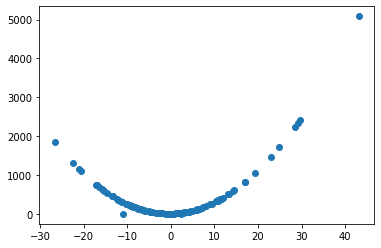

In [136]:
t = matrixTrain[:1,].argsort()
matplotlib.pyplot.scatter(xTrain,yTrain)